### Import PySpark and build a SparkSession

[GitHub Optimus](https://github.com/ironmussa/Optimus)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MeetUp_optimus_pyspark').getOrCreate()

### Start with Optimus 

In [3]:
from optimus import Optimus
op = Optimus(master="local")

#### Read Data

In [6]:
df_train = op.read.csv(
    '../data/train.csv',
    header=True
)

In [ ]:
df_train?

### visualize data with Spark

In [13]:
df_train.show(20)

+--------------------+-------------+----------+--------------------+
|               title|label_quality|  language|            category|
+--------------------+-------------+----------+--------------------+
|Hidrolavadora Lav...|   unreliable|   spanish|ELECTRIC_PRESSURE...|
|Placa De Sonido -...|   unreliable|   spanish|         SOUND_CARDS|
|Maquina De Lavar ...|   unreliable|portuguese|    WASHING_MACHINES|
|Par Disco De Frei...|   unreliable|portuguese| VEHICLE_BRAKE_DISCS|
|Flashes Led Pesta...|   unreliable|   spanish|     FALSE_EYELASHES|
|4 Microaspersor I...|   unreliable|portuguese|IRRIGATION_SPRINK...|
|Raquete Clash 100...|   unreliable|portuguese|            RACQUETS|
|Kit Tripe Para Ce...|   unreliable|portuguese|      CAMERA_TRIPODS|
|Filtro Ar Bonanza...|   unreliable|portuguese|AUTOMOTIVE_AIR_FI...|
|Gatito Lunchera N...|   unreliable|   spanish|          LUNCHBOXES|
|Condensador Bosch...|   unreliable|portuguese|   CAR_AC_CONDENSERS|
|Rosario Contador ...|   unreliabl

### visualize data with Optimus

In [14]:
df_train.table(20)

title 1 (string) nullable,label_quality 2 (string) nullable,language 3 (string) nullable,category 4 (string) nullable
Hidrolavadora⋅Lavor⋅One⋅120⋅Bar⋅1700w⋅⋅Bomba⋅Aluminio⋅Italia,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
Placa⋅De⋅Sonido⋅-⋅Behringer⋅Umc22,unreliable,spanish,SOUND_CARDS
Maquina⋅De⋅Lavar⋅Electrolux⋅12⋅Kilos,unreliable,portuguese,WASHING_MACHINES
Par⋅Disco⋅De⋅Freio⋅Diant⋅Vent⋅Gol⋅8v⋅08/⋅Fremax⋅Bd5298,unreliable,portuguese,VEHICLE_BRAKE_DISCS
Flashes⋅Led⋅Pestañas⋅Luminoso⋅Falso⋅Pestañas⋅Para⋅Partido⋅,unreliable,spanish,FALSE_EYELASHES
"4⋅Microaspersor⋅Irrigação⋅Ultra⋅7,20⋅Metros",unreliable,portuguese,IRRIGATION_SPRINKLERS
Raquete⋅Clash⋅100⋅Tour⋅-⋅Nova,unreliable,portuguese,RACQUETS
"Kit⋅Tripe⋅Para⋅Celular⋅Ou⋅Câmera⋅Fotog⋅1,20m⋅+⋅Brinde⋅+⋅Nf-e",unreliable,portuguese,CAMERA_TRIPODS
Filtro⋅Ar⋅Bonanza⋅1984/1990⋅Sar3589,unreliable,portuguese,AUTOMOTIVE_AIR_FILTERS
Gatito⋅Lunchera⋅Neoprene⋅,unreliable,spanish,LUNCHBOXES


### graph Dataframe with Spark

In [19]:
df_train_language_gb_pd = df_train.groupby('language').count().toPandas()

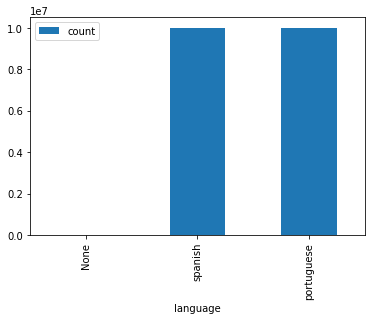

In [28]:
df_train_language_gb_pd.plot.bar(x='language',y='count')

### visualize data with Optimus

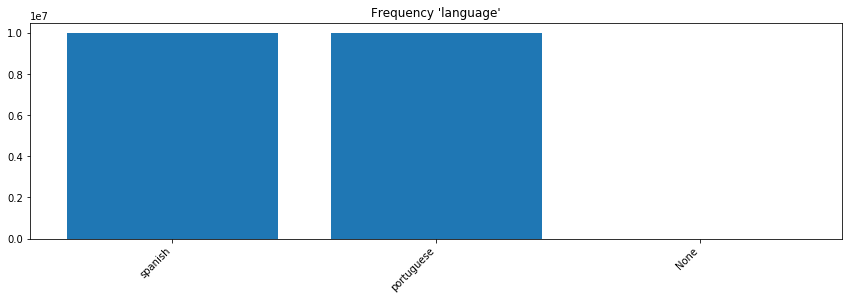

In [20]:
df_train.plot.frequency('language')

Including 'nan' as Null in processing 'language'
Including 'nan' as Null in processing 'title'
Including 'nan' as Null in processing 'label_quality'
Including 'nan' as Null in processing 'language'
Including 'nan' as Null in processing 'category'


Number of columns,4
Number of rows,20000000
Total Missing (%),0.0%
Total size in memory,-1 Bytes
String,1
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,2

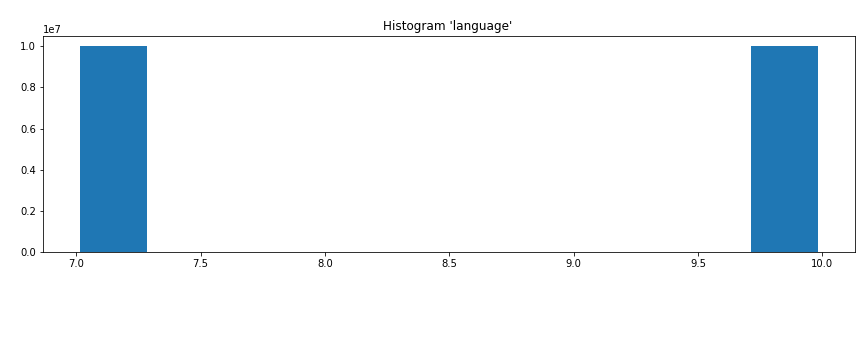
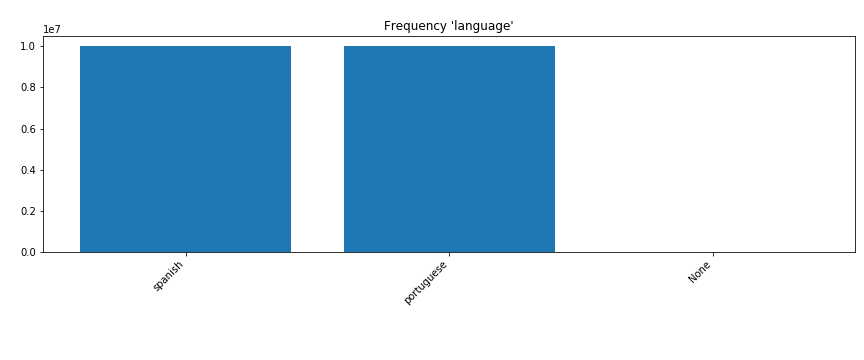

In [12]:
op.profiler.run(df_train, "language", infer=False)